In [1]:
# Support Vector Machine on 20m resolution images

import numpy as np
import pandas as pd
import sklearn
import math
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv(r"./dataset-Icheon&CHL/2000_20m_final_20221106.csv", low_memory = False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             279 non-null    int64  
 1   xcoord(long)   279 non-null    float64
 2   ycoord(lat)    279 non-null    float64
 3   sampling date  279 non-null    object 
 4   sensing date   279 non-null    object 
 5   B2             279 non-null    int64  
 6   B3             279 non-null    int64  
 7   B4             279 non-null    int64  
 8   B5             279 non-null    int64  
 9   B6             279 non-null    int64  
 10  B7             279 non-null    int64  
 11  B8A            279 non-null    int64  
 12  B11            279 non-null    int64  
 13  B12            279 non-null    int64  
 14  NDVI           279 non-null    float64
 15  BSI            279 non-null    float64
 16  EVI            279 non-null    float64
 17  AVI            279 non-null    float64
 18  SAVI      

In [4]:
df = pd.DataFrame(df[['B2','B3','B4','B5','B6','B7','B8A','B11','B12','NDVI','BSI','EVI','AVI','SAVI','NDMI','SOC']])

In [5]:
# df = pd.DataFrame(df[['B2','B3','B4','B5','B6','B7','B8A','B11','B12','NDVI','BSI','SOC']])

In [6]:
df.head()

,B2,B3,B4,B5,B6,B7,B8A,B11,B12,NDVI,BSI,EVI,AVI,SAVI,NDMI,SOC
0,2020,2555,3095,3264,3774,4137,4234,5107,4041,0.155410,0.134754,0.371979,-2461.869129,0.221913,-0.093459,0.71
1,1640,2002,2397,2781,3036,3232,3188,3986,3095,0.141629,0.138703,0.375166,-1821.351929,0.202231,-0.111235,0.71
2,1929,2325,2793,3124,3434,3429,3635,4849,3928,0.130989,0.157353,0.355184,-2044.453828,0.187040,-0.143093,0.71
3,2387,2955,3646,3441,4298,4607,4869,5624,4324,0.143629,0.121869,0.345734,-2789.467172,0.205092,-0.071953,0.71
4,3075,3914,4958,5340,5515,5755,5967,6441,4969,0.092357,0.115307,0.199352,-3101.858919,0.131881,-0.038201,0.86


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [8]:
# normalize1
# band 값만 10000으로 나누기
df['B2'] = df['B2']/10000
df['B3'] = df['B3']/10000
df['B4'] = df['B4']/10000
df['B5'] = df['B5']/10000
df['B6'] = df['B6']/10000
df['B7'] = df['B7']/10000
df['B8A'] = df['B8A']/10000
df['B11'] = df['B11']/10000
df['B12'] = df['B12']/10000

In [9]:
df['AVI'] = df['AVI']/10000
print(df)

         B2      B3      B4      B5      B6      B7     B8A     B11     B12  \
0    0.2020  0.2555  0.3095  0.3264  0.3774  0.4137  0.4234  0.5107  0.4041   
1    0.1640  0.2002  0.2397  0.2781  0.3036  0.3232  0.3188  0.3986  0.3095   
2    0.1929  0.2325  0.2793  0.3124  0.3434  0.3429  0.3635  0.4849  0.3928   
3    0.2387  0.2955  0.3646  0.3441  0.4298  0.4607  0.4869  0.5624  0.4324   
4    0.3075  0.3914  0.4958  0.5340  0.5515  0.5755  0.5967  0.6441  0.4969   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
274  0.2027  0.2407  0.2756  0.3122  0.3377  0.3449  0.3649  0.4283  0.3924   
275  0.1895  0.2369  0.2891  0.3165  0.3277  0.3394  0.3603  0.4378  0.3873   
276  0.1819  0.2208  0.2595  0.2881  0.3015  0.3146  0.3342  0.3940  0.3566   
277  0.2043  0.2483  0.2853  0.3178  0.3425  0.3555  0.3656  0.4255  0.3901   
278  0.1891  0.2344  0.2834  0.3052  0.3162  0.3352  0.3576  0.3887  0.3244   

         NDVI       BSI       EVI       AVI      SA

In [10]:
x = df.iloc[:, :-1]
print(x)

         B2      B3      B4      B5      B6      B7     B8A     B11     B12  \
0    0.2020  0.2555  0.3095  0.3264  0.3774  0.4137  0.4234  0.5107  0.4041   
1    0.1640  0.2002  0.2397  0.2781  0.3036  0.3232  0.3188  0.3986  0.3095   
2    0.1929  0.2325  0.2793  0.3124  0.3434  0.3429  0.3635  0.4849  0.3928   
3    0.2387  0.2955  0.3646  0.3441  0.4298  0.4607  0.4869  0.5624  0.4324   
4    0.3075  0.3914  0.4958  0.5340  0.5515  0.5755  0.5967  0.6441  0.4969   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
274  0.2027  0.2407  0.2756  0.3122  0.3377  0.3449  0.3649  0.4283  0.3924   
275  0.1895  0.2369  0.2891  0.3165  0.3277  0.3394  0.3603  0.4378  0.3873   
276  0.1819  0.2208  0.2595  0.2881  0.3015  0.3146  0.3342  0.3940  0.3566   
277  0.2043  0.2483  0.2853  0.3178  0.3425  0.3555  0.3656  0.4255  0.3901   
278  0.1891  0.2344  0.2834  0.3052  0.3162  0.3352  0.3576  0.3887  0.3244   

         NDVI       BSI       EVI       AVI      SA

In [11]:
y = df.iloc[:, -1:]

In [12]:
print(y)

      SOC
0    0.71
1    0.71
2    0.71
3    0.71
4    0.86
..    ...
274  3.22
275  3.30
276  3.30
277  3.30
278  2.51

[279 rows x 1 columns]


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.25)

In [19]:
from sklearn.svm import SVR
import numpy as np
np.random.seed(0)
Y = y_train
X = x_train
parameters = {'kernel': ('linear','rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.3,0.5]}
svr = SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(X,Y.ravel())
clf.best_params_

## 결과 linear로 나옴

{'C': 10, 'epsilon': 0.5, 'gamma': 1e-07, 'kernel': 'linear'}

In [26]:
##########모델 생성
from sklearn.metrics import mean_squared_error, explained_variance_score
model = SVR(kernel='linear', C=10, epsilon=0.5, gamma= 1e-07)
# model = SVR()

In [27]:
##########모델 학습

model.fit(x_train, y_train.ravel())

SVR(C=10, epsilon=0.5, gamma=1e-07, kernel='linear')

In [28]:
##########모델 검증

print(model.score(x_train, y_train)) #

print(model.score(x_test, y_test)) #

0.21828143851075743
0.21173982749234543


In [29]:
# R-squared

model.score(x.values,y.values)

0.2181592290334443

In [30]:
#mse = mean_squared_error(y_test, y_pred)
#evs = explained_variance_score(y_test, y_pred)

In [31]:
print(x.values.shape)
print(model.predict(x.values).shape)
print(y.values.shape)

(279, 15)
(279,)
(279, 1)


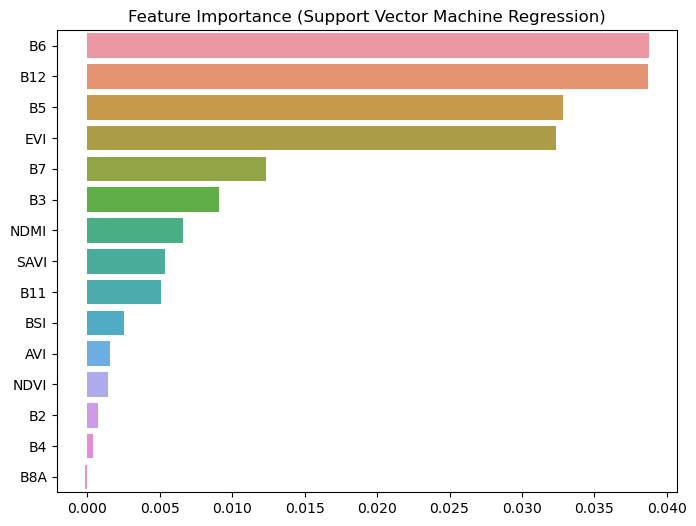

In [32]:
# feature importance

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.inspection import permutation_importance

# perform permutation importance
results = permutation_importance(model, x_train, y_train, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# sort feature importance
ftr_top = {}
# plot feature importance

for i,v in enumerate(importance):
    ftr_top[x.columns[i]] = v
    


ftr_top = pd.Series(dict(sorted(ftr_top.items(), key=lambda x: x[1], reverse=True)))

# print(ftr_top)
    
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.title('Feature Importance (Support Vector Machine Regression)')
plt.show()


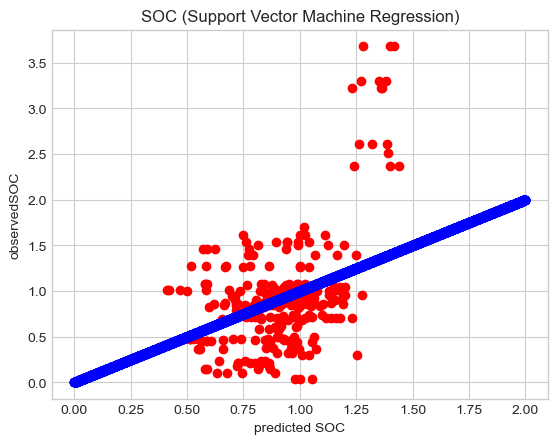

In [33]:
# Predicted versus observed SOC
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
X_grid = np.linspace(math.floor(min(model.predict(x.values))), math.ceil(max(model.predict(x.values))),10000)  # X의 최소값부터 X의 최대값까지 0.01 단위로 값 채우기
#X_grid = X_grid.reshape((len(X_grid),1))  # n X 1 행렬로 변환
plt.scatter(model.predict(x.values), y.values, color='red')
plt.scatter(X_grid,X_grid, color='blue')
plt.title('SOC (Support Vector Machine Regression)')
plt.xlabel('predicted SOC')
plt.ylabel('observedSOC')
plt.show()